In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, validation_curve, cross_val_score, StratifiedShuffleSplit, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.shape

(300000, 8)

In [4]:
df.columns

Index(['url_length', 'num_subdomains', 'has_https', 'num_hyphens',
       'num_special_chars', 'has_suspicious_keyword', 'num_external_links',
       'label'],
      dtype='object')

In [16]:
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr_model = LogisticRegression(max_iter=1000)  
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
lr_pred = lr_model.predict(X_test)

In [19]:
recall_lr = recall_score(y_test, lr_pred, pos_label=1)
f1_lr = f1_score(y_test, lr_pred, pos_label=1)

In [20]:
print("Logistic Regression Benchmark Results:")
print(f"Recall for phishing class: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, lr_pred, target_names=['Benign', 'Phishing']))

Logistic Regression Benchmark Results:
Recall for phishing class: 0.9338
F1 Score: 0.8948

Detailed Classification Report:
              precision    recall  f1-score   support

      Benign       0.93      0.85      0.89     30093
    Phishing       0.86      0.93      0.89     29907

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



In [21]:
xgb_model = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, objective='binary:logistic', eval_metric='logloss', random_state=42)

In [22]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
y_pred = xgb_model.predict(X_test)

In [24]:
recall, f1 = recall_score(y_test, y_pred), f1_score(y_test, y_pred)
print(f"Recall for phishing class: {recall:.4f}", f"F1 Score: {f1:.4f}")


Recall for phishing class: 0.9203 F1 Score: 0.9126


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Phishing']))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.90      0.91     30093
    Phishing       0.91      0.92      0.91     29907

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



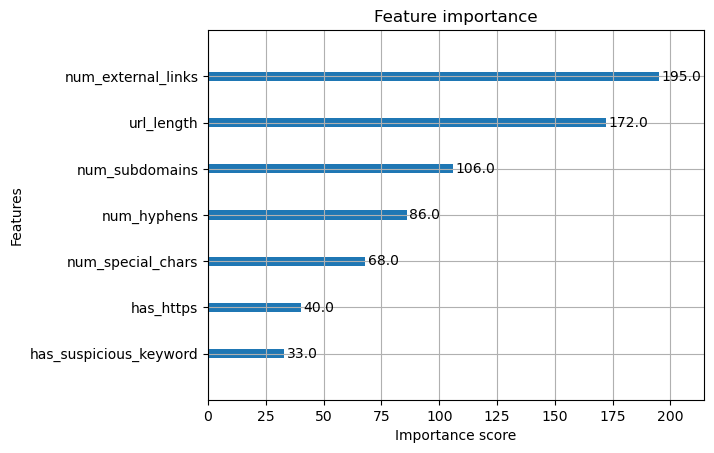

In [26]:
xgb.plot_importance(xgb_model)
plt.show()